# Activity 4 — Digital Coin Flip and 1D Random Walk

 

This activity guides you to build a small simulation that: (1) flips a fair coin multiple times, (2) summarizes heads/tails counts and percentages, and (3) uses the flips to drive a 1D random walk. You will also optionally visualize the path(s).

 

Deliver a working notebook that meets all requirements below.

## What to Build (Requirements)

Create a clean, runnable notebook that includes:



1) Parameters cell

- total_flips: integer >= 0 (default 100)

- num_simulations: integer >= 1 (default 3)

- base_seed: None or integer (if integer, run i uses base_seed + i)



2) Helper code

- A function to simulate n coin flips: returns a structure with flips (list of 0/1), heads_count, tails_count.

- A function to compute a 1D random walk from flips: starting at 0, +1 for heads, −1 for tails, returns final_position and the entire position trace (list).

- A function to run multiple simulations (num_simulations), using threads or simple loops, returning per-run results.



3) Output for single run

- If num_simulations == 1: print the counts, percentages, and final position. Keep the walk trace available for plotting.



4) Output for multiple runs

- If num_simulations > 1: print summary across persons (average heads, average tails, average final position) and per-person stats. Keep the last run’s details for optional plotting.



5) Optional visualization (bonus)

- Use matplotlib to plot the walk trace for a single run or multiple traces for multiple runs. Handle missing matplotlib gracefully (do not crash if not installed).

## 1. Parameters
Set the number of coin flips, number of simulations, and base seed for reproducibility. You can change these values and re-run the notebook.

In [ ]:
try:
    total_flips = 100
except NameError:
    print("total_flips is not defined; using default value 100")

try:
    num_simulations = 3
except NameError:
    print("num_simulations is not defined; using default value 3")

try:
    base_seed = None
except NameError:
    print("base_seed is not defined; using default value None")

print(f"Total flips per simulation: {total_flips}")
print(f"Number of simulations (persons): {num_simulations}")
print(f"Base seed: {base_seed}")

Total flips per simulation: 100
Number of simulations (persons): 3
Base seed: None


## 2. Simulation Helpers
Functions to simulate coin flips, compute random walk, and run multiple simulations.

In [ ]:
import random
from typing import List, Tuple, Dict, Optional

def simulate_coin_flips(n: int, seed: Optional[int] = None) -> Dict:
    """Simulate n coin flips. Returns dict with flips, heads_count, tails_count."""
    if n < 0:
        raise ValueError("Number of flips must be >= 0")
    if seed is not None:
        random.seed(seed)
    flips = [random.choice([0, 1]) for _ in range(n)]
    heads_count = sum(flips)
    tails_count = n - heads_count
    return {
        'flips': flips,
        'heads_count': heads_count,
        'tails_count': tails_count
    }

def random_walk_from_flips(flips: List[int]) -> Tuple[int, List[int]]:
    """Convert flips to 1D random walk. Returns final position and trace."""
    position = 0
    trace = [position]
    for flip in flips:
        position += 1 if flip == 1 else -1
        trace.append(position)
    return position, trace

def run_simulations(total_flips: int, num_runs: int, base_seed: Optional[int] = None):
    """Run multiple simulations, return per-run results."""
    results = []
    for i in range(num_runs):
        seed = base_seed + i if base_seed is not None else None
        sim = simulate_coin_flips(total_flips, seed)
        final_pos, trace = random_walk_from_flips(sim['flips'])
        results.append({
            'flips': sim['flips'],
            'heads_count': sim['heads_count'],
            'tails_count': sim['tails_count'],
            'final_position': final_pos,
            'trace': trace
        })
    return results

## 3. Run Simulations and Show Summaries
Run one or more simulations and print summary statistics.

In [ ]:
results = run_simulations(total_flips, num_simulations, base_seed)

if num_simulations == 1:
    r = results[0]
    heads_pct = 100 * r['heads_count'] / total_flips if total_flips > 0 else 0
    tails_pct = 100 * r['tails_count'] / total_flips if total_flips > 0 else 0
    print(f"Heads: {r['heads_count']} ({heads_pct:.1f}%)")
    print(f"Tails: {r['tails_count']} ({tails_pct:.1f}%)")
    print(f"Final position: {r['final_position']}")
    walk_trace = r['trace']
else:
    avg_heads = sum(r['heads_count'] for r in results) / num_simulations
    avg_tails = sum(r['tails_count'] for r in results) / num_simulations
    avg_final = sum(r['final_position'] for r in results) / num_simulations
    print(f"--- Coin Flip Summary ({num_simulations} persons) ---")
    print(f"Flips per person: {total_flips}")
    print(f"Average Heads: {avg_heads:.2f}")
    print(f"Average Tails: {avg_tails:.2f}")
    print(f"Average Final Position: {avg_final:.2f}\n")
    for idx, r in enumerate(results):
        heads_pct = 100 * r['heads_count'] / total_flips if total_flips > 0 else 0
        tails_pct = 100 * r['tails_count'] / total_flips if total_flips > 0 else 0
        print(f"Person {idx+1}: Heads={r['heads_count']} ({heads_pct:.1f}%), Tails={r['tails_count']} ({tails_pct:.1f}%), FinalPos={r['final_position']}")
    walk_trace = results[-1]['trace'] 

--- Coin Flip Summary (3 persons) ---
Flips per person: 100
Average Heads: 51.00
Average Tails: 49.00
Average Final Position: 2.00

Person 1: Heads=46 (46.0%), Tails=54 (54.0%), FinalPos=-8
Person 2: Heads=46 (46.0%), Tails=54 (54.0%), FinalPos=-8
Person 3: Heads=61 (61.0%), Tails=39 (39.0%), FinalPos=22


## Visualize the Random Walk(s) 
Plot the walk trace for a single run, or all traces for multiple runs. Handles missing matplotlib gracefully.

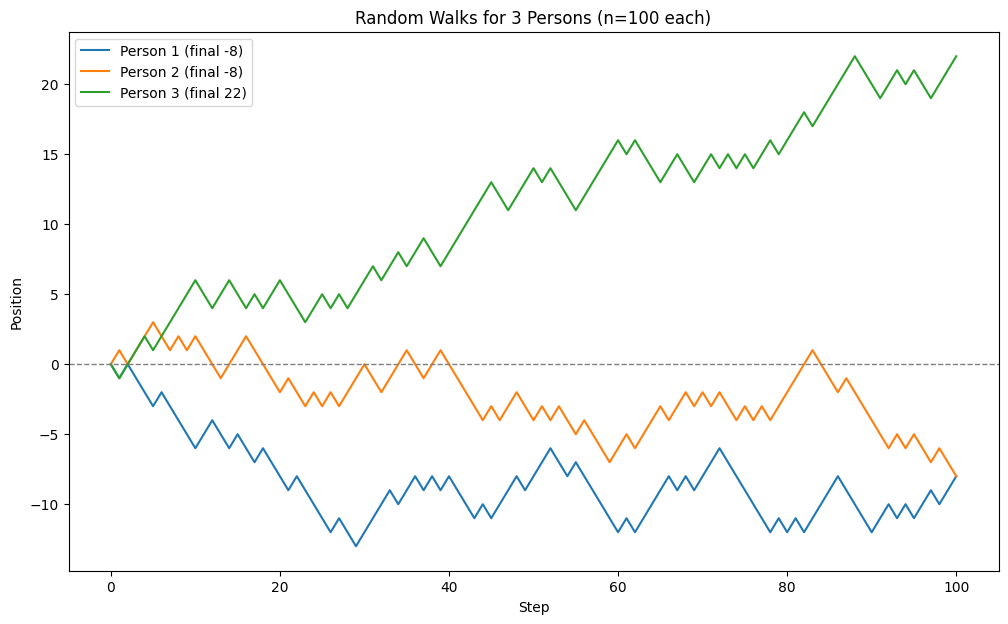

In [ ]:
try:
    import matplotlib.pyplot as plt
    if num_simulations == 1:
        plt.figure(figsize=(12, 7))
        plt.plot(walk_trace, label='Random Walk')
        plt.axhline(0, color='gray', linestyle='--', linewidth=1)
        plt.xlabel('Step')
        plt.ylabel('Position')
        plt.title('1D Random Walk')
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(12, 7))
        for idx, r in enumerate(results):
            plt.plot(r['trace'], label=f'Person {idx+1} (final {r["final_position"]})')
        plt.axhline(0, color='gray', linestyle='--', linewidth=1)
        plt.xlabel('Step')
        plt.ylabel('Position')
        plt.title(f'Random Walks for {num_simulations} Persons (n={total_flips} each)')
        plt.legend()
        plt.show()
except ImportError:
    print("matplotlib not installed; skipping plot.")